In [97]:
# import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv('spotify_data.csv')

# looking first few rows of the dataset
print(data.head())

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  
0      0  
1      1  
2      0  
3      1  
4      1  


In [99]:
# FEATURES A
# choosing the features for clustering
features_1 = data[['loudness', 'duration_ms']]

# scaling the features to standardize the data for clustering
scaler = StandardScaler()
scaled_features_1 = scaler.fit_transform(features_1)

In [101]:
# determining the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):  # test cluster numbers from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features_1)
    inertia.append(kmeans.inertia_)

/Users/lulia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lulia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lulia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/lulia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

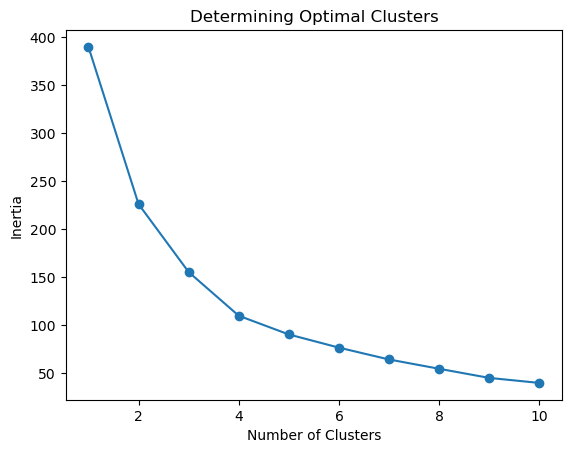

In [103]:
# plotting the elbow curve to find the optimal number of clusters
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Determining Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [105]:
# based on the elbow curve shown above, set the number of clusters
n_clusters = 3  

# perform k-means clustering on the scaled features
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features_1)

/Users/lulia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


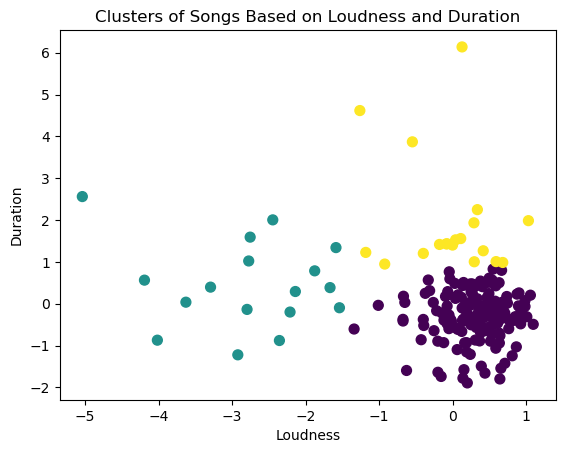

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  cluster  
0      0        2  
1      1        0  
2      0

In [107]:
# adding the cluster labels back to the original dataset
data['cluster'] = clusters

# visualizing the clusters using loudness and duration
plt.scatter(scaled_features_1[:, 0], scaled_features_1[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('Clusters of Songs Based on Loudness and Duration')
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.show()

# displaying a few rows of the dataset with the cluster labels
print(data.head())

# saving the clustered data to a new csv file
data.to_csv('clustered_songs.csv', index=False)

In [81]:
# Measure the accuracy of the first k-means clustering algorithm with the loudness and duration_ms features using the 'liked' column to determine how accurate our recommendations are (like recommending songs from the same cluster)

In [109]:
from sklearn.metrics import accuracy_score

# Define a function to measure the accuracy of the k-means clustering based on the 'liked' column
def calculate_accuracy(data, clusters, label_column='liked'):
    # Add the cluster labels to the dataset
    data['cluster'] = clusters
    
    # Map each cluster to the majority class in the 'liked' column
    cluster_majority = (
        data.groupby('cluster')[label_column]
        .agg(lambda x: x.value_counts().idxmax())
        .to_dict()
    )
    
    # Predict the 'liked' status based on cluster majority
    data['predicted_liked'] = data['cluster'].map(cluster_majority)
    
    # Calculate the accuracy of the predictions
    accuracy = accuracy_score(data[label_column], data['predicted_liked'])
    return accuracy

# Perform clustering on the scaled features
n_clusters = 3  # Assuming 3 clusters based on the elbow method
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_features_1)

# Measure the accuracy
accuracy = calculate_accuracy(data, clusters, label_column='liked')
accuracy


/Users/lulia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.6871794871794872

# 3D PLOT

In [111]:
# FEATURES B
# choosing the features for clustering
features_2 = data[['loudness', 'duration_ms', 'speechiness']]

# scaling the features to standardize the data for clustering
scaler = StandardScaler()
scaled_features_2 = scaler.fit_transform(features_2)

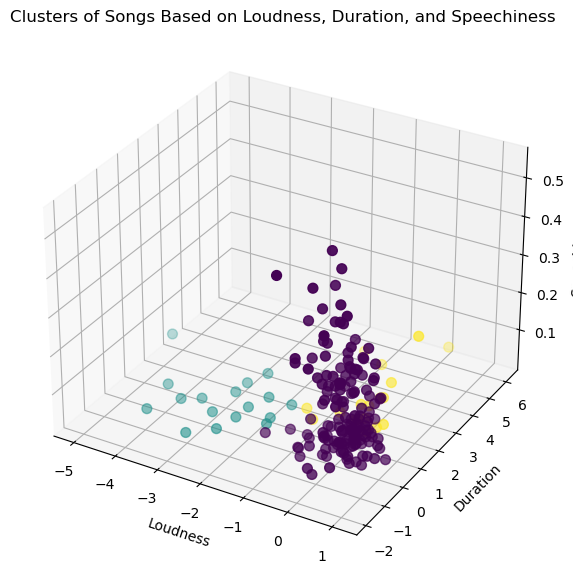

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.803  0.6240    7    -6.764     0       0.0477         0.451   
1         0.762  0.7030   10    -7.951     0       0.3060         0.206   
2         0.261  0.0149    1   -27.528     1       0.0419         0.992   
3         0.722  0.7360    3    -6.994     0       0.0585         0.431   
4         0.787  0.5720    1    -7.516     1       0.2220         0.145   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.000734    0.1000   0.6280   95.968       304524               4   
1          0.000000    0.0912   0.5190  151.329       247178               4   
2          0.897000    0.1020   0.0382   75.296       286987               4   
3          0.000001    0.1230   0.5820   89.860       208920               4   
4          0.000000    0.0753   0.6470  155.117       179413               4   

   liked  cluster  predicted_liked  
0      0        2              

In [113]:
# FEATURES B
# Adding the cluster labels back to the original dataset
data['cluster'] = clusters

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters using loudness, duration, and speechiness
ax.scatter(
    scaled_features_2[:, 0],  # Loudness (scaled)
    scaled_features_2[:, 1],  # Duration (scaled)
    data['speechiness'],      # Speechiness (can be scaled if needed)
    c=clusters, cmap='viridis', s=50
)

# Add axis labels and a title
ax.set_title('Clusters of Songs Based on Loudness, Duration, and Speechiness')
ax.set_xlabel('Loudness')
ax.set_ylabel('Duration')
ax.set_zlabel('Speechiness')

# Show the plot
plt.show()

# Display a few rows of the dataset with the cluster labels
print(data.head())

# Save the clustered data to a new CSV file
data.to_csv('clustered_songs_3d.csv', index=False)